In [1]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
file_path = '../data/random_data.csv'

df = pd.read_csv(file_path)
df = df.drop('y_pred_random_forest', axis=1)
df.rename(columns={'y_pred_logistic': 'y_pred'}, inplace=True)
df.head()

,y_act,y_pred
0,1,0.531904
1,0,0.414496
2,1,0.569883
3,1,0.443674
4,0,0.369532


In [3]:
df['y_pred'] = (df.y_pred >= 0.5).astype('int')
df.head()

,y_act,y_pred
0,1,1
1,0,0
2,1,1
3,1,0
4,0,0


In [4]:
cm = confusion_matrix(df.y_act, df.y_pred)

In [5]:
print(cm)

[[5425 2454]
 [3600 4279]]


In [6]:
# Classification report
print(classification_report(df.y_act, df.y_pred))

# NOTE: Support is the number of actual occurrences of the class in the specified dataset

              precision    recall  f1-score   support

           0       0.60      0.69      0.64      7879
           1       0.64      0.54      0.59      7879

    accuracy                           0.62     15758
   macro avg       0.62      0.62      0.61     15758
weighted avg       0.62      0.62      0.61     15758



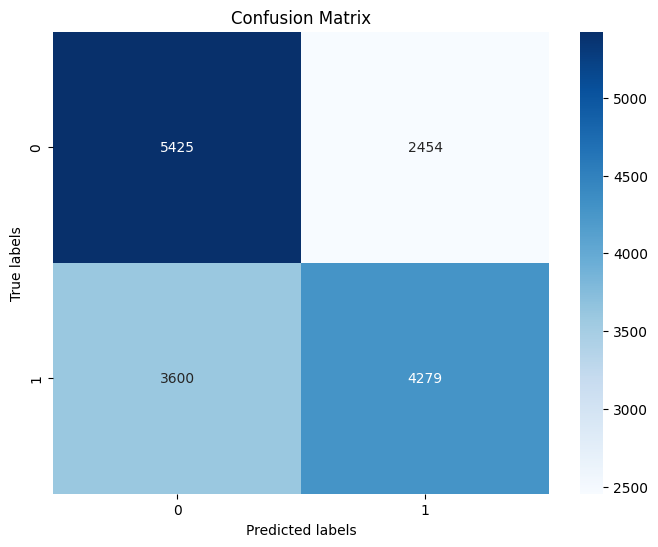

In [7]:
# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [8]:
classes = {'Classes': ['y_act_label', 'y_pred_label']}
df_classes = pd.DataFrame(data=classes)
label_enc = LabelEncoder()
label_enc.fit(df_classes['Classes'])
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = label_enc.classes_)

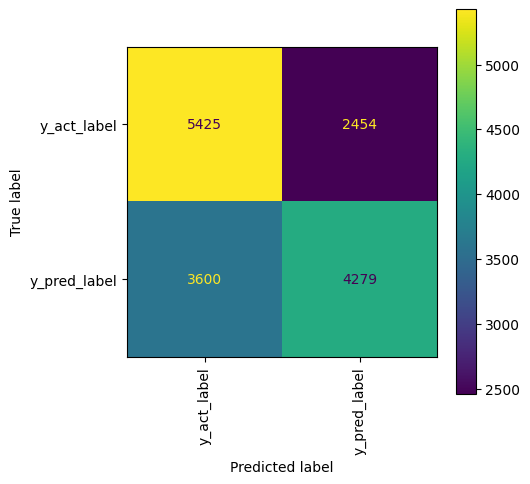

In [9]:
# Plot confusion matrix with class labels
fig, ax = plt.subplots(figsize=(5,5))
display.plot(ax=ax, xticks_rotation='vertical')
plt.show()